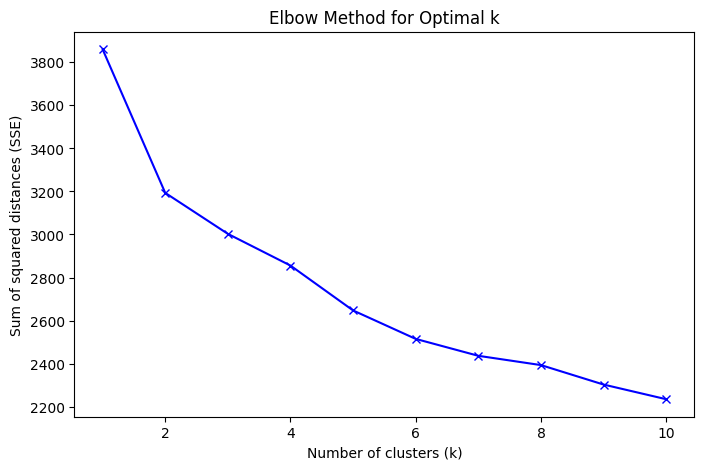

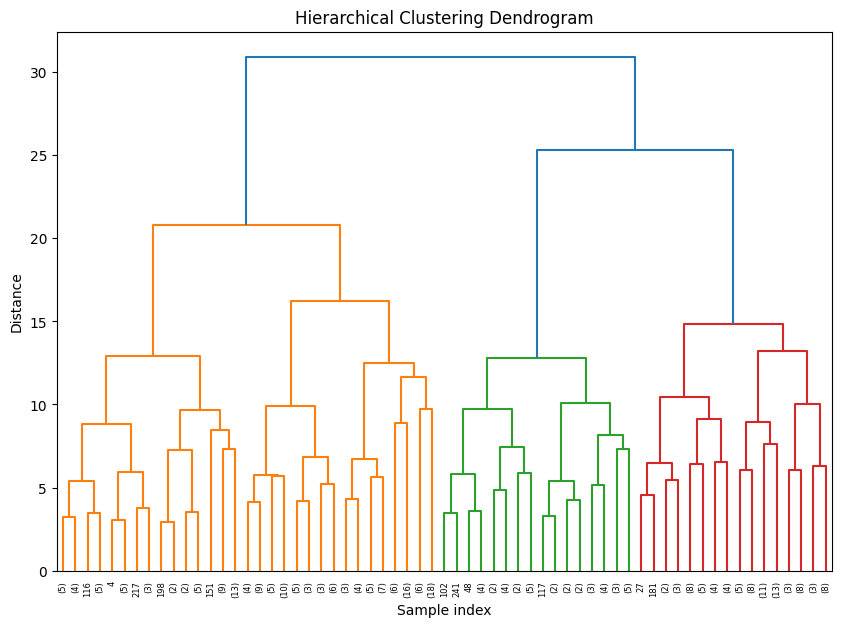

In [2]:
# 05_unsupervised_learning.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load cleaned data
df = pd.read_csv('../data/heart_disease_cleaned.csv')
X = df.drop('target', axis=1)
y = df['target']

# K-Means clustering with elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose k=3 for example
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Hierarchical Clustering dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
